In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859-1')  # adjust path if needed
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom


In [3]:
# Keep only numeric columns for clustering
# Here: Quantity and UnitPrice
numeric_features = ['Quantity', 'UnitPrice']
X = df[numeric_features].fillna(0)


In [4]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Compute hierarchical linkage
method = 'ward'  # or 'single', 'complete', 'average'
Z = linkage(X_scaled, method=method)


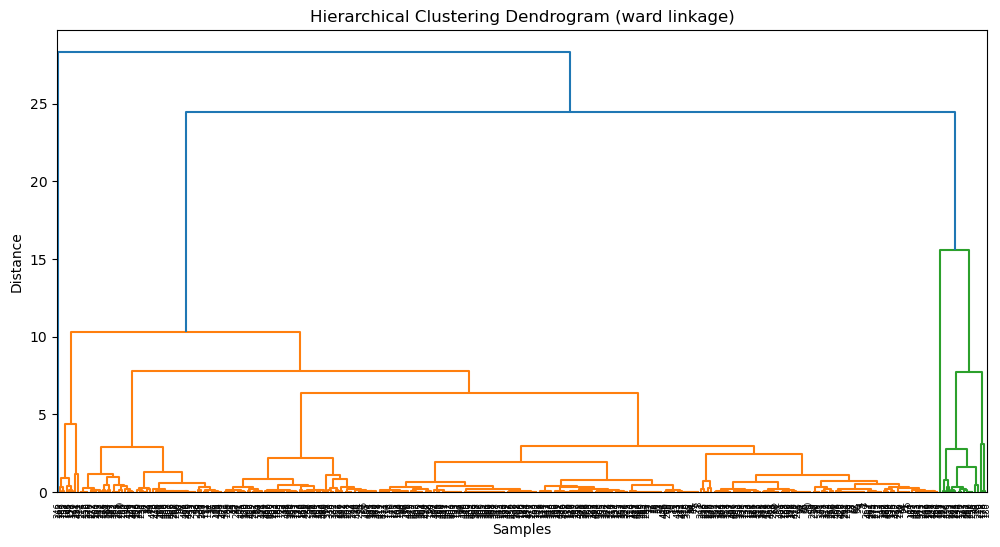

In [6]:
# Dendrogram
plt.figure(figsize=(12,6))
dendrogram(Z, leaf_rotation=90, leaf_font_size=6)
plt.title(f"Hierarchical Clustering Dendrogram ({method} linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [7]:
# Assign clusters
n_clusters = 5
cluster_labels = fcluster(Z, t=n_clusters, criterion='maxclust')
df['Cluster'] = cluster_labels
df[['InvoiceNo', 'CustomerID', 'Quantity', 'UnitPrice', 'Cluster']].head(10)


,InvoiceNo,CustomerID,Quantity,UnitPrice,Cluster
0,536365,17850,6,2.55,2
1,536365,17850,6,3.39,2
2,536365,17850,8,2.75,2
3,536365,17850,6,3.39,2
4,536365,17850,6,3.39,2
5,536365,17850,2,7.65,2
6,536365,17850,6,4.25,2
7,536366,17850,6,1.85,2
8,536366,17850,6,1.85,2
9,536367,13047,32,1.69,2


In [8]:
# Cluster counts
df['Cluster'].value_counts()


Cluster
2    461
4     24
1     11
3      2
5      1
Name: count, dtype: int64

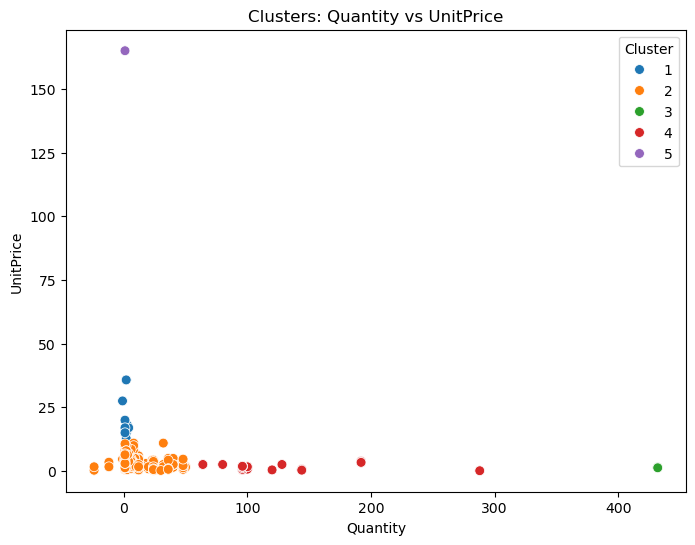

In [9]:
# Scatter plot of Quantity vs UnitPrice
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Quantity'],
    y=df['UnitPrice'],
    hue=df['Cluster'],
    palette='tab10',
    s=50
)
plt.title("Clusters: Quantity vs UnitPrice")
plt.show()


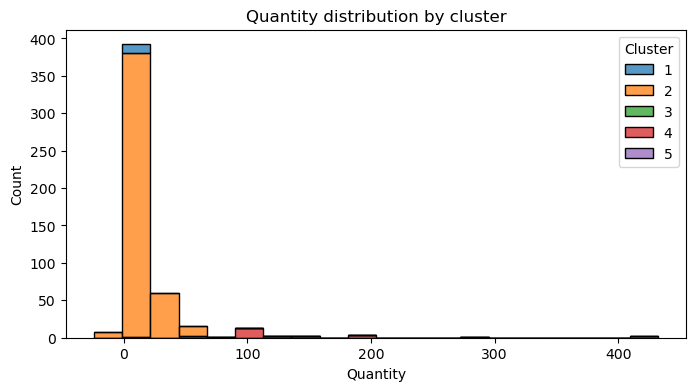

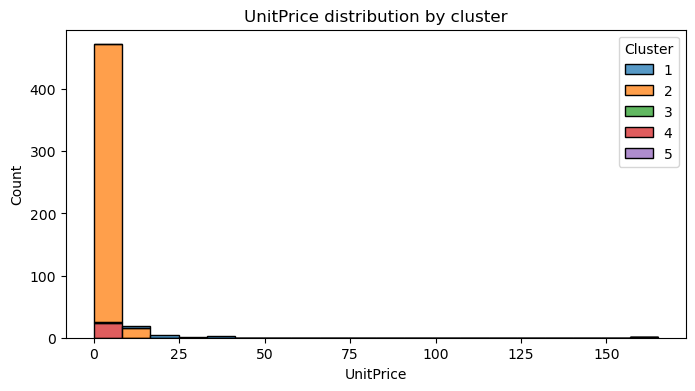

In [10]:
# Histograms of numeric features by cluster
for feature in numeric_features:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=feature, hue='Cluster', multiple='stack', palette='tab10', bins=20)
    plt.title(f"{feature} distribution by cluster")
    plt.show()
